In [426]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt


In [427]:
class TrainCrashData:
    
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path
        self.data = None
        self.cleaned_data = None
        
    def load_data(self):
        self.data = pd.read_csv(self.dataset_path)
    def clean_data(self):
        self.cleaned_data = self.data.dropna()
        
    def count_clean_records(self):
        return len(self.cleaned_data)
    
    def most_common_embarked(self):
        return self.cleaned_data['station'].mode()[0]
    
    def explore_data(self):
        print("Data Head:")
        print(self.cleaned_data.head())
        print("Data Info:")
        print(self.cleaned_data.info())
        print("\nData Description:")
        pd.options.display.float_format = '{:.2f}'.format
        print(self.cleaned_data.describe())
        print("\nUnique Values Count:")
        print(self.cleaned_data.nunique())
        # Determine variables to exclude based on exploration
        print()
        exclude_variables = ['parch', 'fare', 'station']
        return exclude_variables
     
    #transform data
    
    def outliers(self): 
        print('Since it is mostly a binary kind of dataset, it does not have any significant outliers.')
    
    
    def transform_data(self):
        self.cleaned_data['sex_binary'] = self.cleaned_data.sex.map({'male':0,"female":1})
        self.cleaned_data['station_C_binary'] = self.cleaned_data.station.map({'S':0,'C':1,'Q':0})
        self.cleaned_data['station_S_binary'] = self.cleaned_data.station.map({'S':1,'C':0,'Q':1})

        self.cleaned_data.drop(columns=['sex', 'station'], inplace=True)
        print( self.cleaned_data.head())
        
        
    def split_data(self):
        X = self.cleaned_data.drop(columns=['survived'])
        y = self.cleaned_data ['survived']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, train_size=0.7, test_size=0.3, random_state=12345)
        
        
    def build_knn_model(self):
        #create empty list 
        #creating empty lists to hold results
        training_accuracy = []
        test_accuracy = []
        
        
        #This is a range for different values of “k”.
        neighbors_settings = range(1,10)
        
        from sklearn.neighbors import KNeighborsClassifier
        
        for n_neigh in neighbors_settings:
            modelfit = sk.neighbors.KNeighborsClassifier(n_neighbors=n_neigh)
            modelfit.fit(self.X_train, self.y_train)
            training_accuracy.append(modelfit.score(self.X_train, self.y_train))
            test_accuracy.append(modelfit.score(self.X_test, self.y_test))

         # Plotting training and test accuracy vs. number of neighbors (k)
        plt.figure(figsize=(10, 6))
        plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
        plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
        plt.xlabel("Number of Neighbors (k)")
        plt.ylabel("Accuracy")
        plt.title("KNN Model Performance")
        plt.legend()
        plt.show()
        
    def k_value(self):
    # The best value of k is 7
    #Fit the model
        modelfit = KNeighborsClassifier(n_neighbors=7)
        modelfit.fit(self.X_train, self.y_train)
        print('The best value of K is:',7 )
        print("Train set accuracy: ", modelfit.score(self.X_train, self.y_train))
        print("Test set accuracy: ", modelfit.score(self.X_test, self.y_test))
        
        
        
    def build_logistic_regression_model(self):
        
        # Build and evaluate Logistic Regression model
        logistic_model = LogisticRegression()
        logistic_model.fit(self.X_train, self.y_train)    
        print("Train set accuracy: ", logistic_model.score(self.X_train, self.y_train))
        print("Test set accuracy: ", logistic_model.score(self.X_test, self.y_test))
        
    def build_decision_tree_model(self): 
        tree_training_accuracy = []
        tree_test_accuracy = []
        
        #This is a range for different values of “tree_depth”
        
        tree_depth = range(1,15)
        
        for td in tree_depth:
            treeMod = DecisionTreeClassifier(max_depth=td, random_state=8)
            treeMod.fit(self.X_train, self.y_train)
            tree_training_accuracy.append(treeMod.score(self.X_train, self.y_train))
            tree_test_accuracy.append(treeMod.score(self.X_test, self.y_test))
         
        # Plotting training and test accuracy vs. Depth of Tree
        
        plt.figure(figsize=(10, 6))
        plt.plot(tree_depth, tree_training_accuracy, label = "Training Accuracy")
        plt.plot(tree_depth, tree_test_accuracy, label = "Test Accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("Depth of Tree")
        plt.title("Model of Decision Tree")
        plt.legend()
        plt.show()
        
    def decision_tree(self):
        treeMod = DecisionTreeClassifier(max_depth=3, random_state=8)
        treeMod.fit(self.X_train, self.y_train)
        print('The best depth of the tree is :',3 )
        print("Train set accuracy: ", treeMod.score(self.X_train, self.y_train))
        print("Test set accuracy: ", treeMod.score(self.X_test, self.y_test))

    #Based on the results of k-nearest neighbor, decision tree and logistic regression/ 
    #the best model to classify the data/ 
    #Provided explanation to support the argument.   


    def decision_model(self):
        # Model names
        models = ['Decision Tree', 'Logistic Regression', 'KNN']

        # Accuracy scores
        train_accuracies = [0.8293, 0.7791, 0.7470]
        test_accuracies = [0.8178, 0.8131, 0.7103]

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.bar(models, train_accuracies, label='Train Accuracy', alpha=0.7)
        plt.bar(models, test_accuracies, label='Test Accuracy', alpha=0.7)

        # Adding labels and title
        plt.xlabel('Models')
        plt.ylabel('Accuracy')
        plt.title('Comparison of Model Accuracies')
        plt.ylim(0.7, 0.85)
        plt.legend()

        # Show plot
        plt.show()
        
        # Print recommendation based on comparison
        print("Based on the comparison:")
        print("- Decision Tree has the highest test accuracy and shows good generalization.")
        print("- Logistic Regression performs reasonably well.")
        print("- KNN has the lowest test accuracy and may overfit the data.")
        print("\nTherefore, the Decision Tree model is recommended as the best choice for classifying the data.")
     
    
    #some interesting graphs of the data   
        
    def plot_survival_distribution(self):
        # Plot survival distribution
        plt.figure(figsize=(8, 6))
        sns.countplot(x='survived', data=self.cleaned_data)
        plt.title('Survival Distribution')
        plt.xlabel('Survived')
        plt.ylabel('Count')
        plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
        plt.show()
        
    def plot_sex_distribution(self):
        # Plot gender distribution
        plt.figure(figsize=(8, 6))
        sns.countplot(x='sex_binary', data=self.cleaned_data)
        plt.title('Gender Distribution')
        plt.xlabel('sex')
        plt.ylabel('Count')
        plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

        plt.show()
        
        
    def plot_survival_by_sex(self):
        # Plot survival by gender
        plt.figure(figsize=(8, 6))
        sns.countplot(x='sex_binary', hue='survived', data=self.cleaned_data)
        plt.title('Survival by Gender')
        plt.xlabel('Sex')
        plt.ylabel('Count')
        plt.legend(title='Survived', labels=['No', 'Yes'])
        plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

        plt.show()
        
        
        
    def plot_age_distribution(self):
        # Plot age distribution
        plt.figure(figsize=(8, 6))
        sns.histplot(data=self.cleaned_data, x='age', bins=20, kde=True)
        plt.title('Age Distribution')
        plt.xlabel('Age')
        plt.ylabel('Count')
        plt.show()

        
        
    def plot_survival_by_class(self):
        # Plot survival by passenger class
        plt.figure(figsize=(8, 6))
        sns.countplot(x='pclass', hue='survived', data=self.cleaned_data)
        plt.title('Survival by Passenger Class')
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.legend(title='Survived', labels=['No', 'Yes'])
        plt.show()

In [428]:
train_data_obj = TrainCrashData('TrainData.csv')

train_data_obj.load_data()
train_data_obj.clean_data()
num_clean_records = train_data_obj.count_clean_records()
print(f"Number of clean records after data cleaning: {num_clean_records}")
print()
most_common_station = train_data_obj.most_common_embarked()
print(f"The train picked most passengers from station: {most_common_station}")
print()
exclude_vars = train_data_obj.explore_data()
print(f"Variables to exclude from modeling: {exclude_vars}")



Number of clean records after data cleaning: 712

The train picked most passengers from station: S

Data Head:
   survived  pclass     sex   age  sibsp  parch  fare station
0         0       3    male 22.00      1      0  7.25       S
1         1       1  female 38.00      1      0 71.28       C
2         1       3  female 26.00      0      0  7.92       S
3         1       1  female 35.00      1      0 53.10       S
4         0       3    male 35.00      0      0  8.05       S
Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   station   712 non-null    object 
dtypes: float64(2

In [429]:
train_data_obj.outliers()

Since it is mostly a binary kind of dataset, it does not have any significant outliers.


In [430]:
import warnings
warnings.filterwarnings("ignore")

train_data_obj.transform_data()

   survived  pclass   age  sibsp  parch  fare  sex_binary  station_C_binary  \
0         0       3 22.00      1      0  7.25           0                 0   
1         1       1 38.00      1      0 71.28           1                 1   
2         1       3 26.00      0      0  7.92           1                 0   
3         1       1 35.00      1      0 53.10           1                 0   
4         0       3 35.00      0      0  8.05           0                 0   

   station_S_binary  
0                 1  
1                 0  
2                 1  
3                 1  
4                 1  


In [431]:
train_data_obj.split_data()

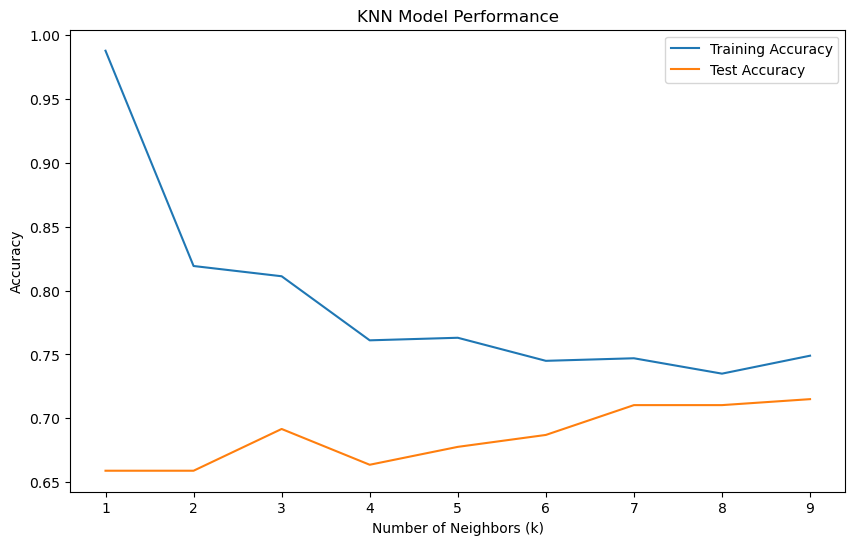

In [432]:
train_data_obj.build_knn_model()

In [433]:
train_data_obj.k_value()

The best value of K is: 7
Train set accuracy:  0.7469879518072289
Test set accuracy:  0.7102803738317757


In [434]:
train_data_obj.build_logistic_regression_model()

Train set accuracy:  0.7791164658634538
Test set accuracy:  0.8130841121495327


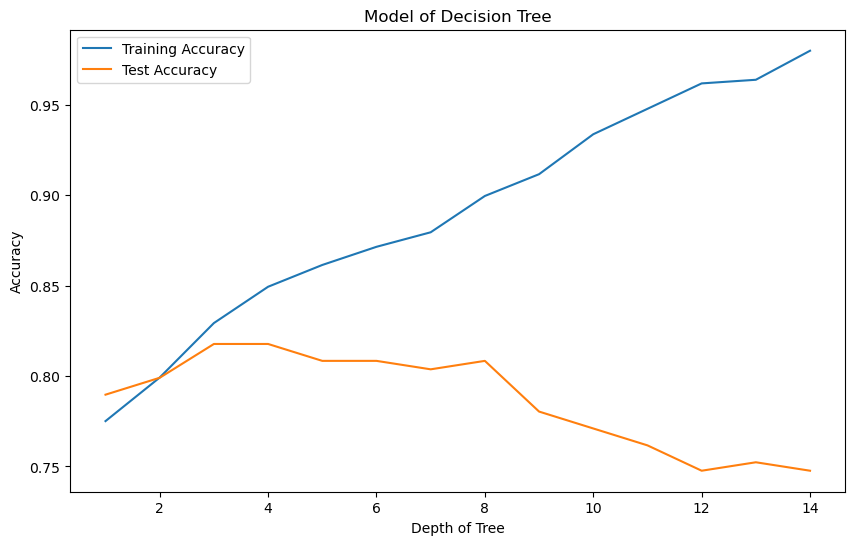

In [435]:
train_data_obj.build_decision_tree_model()

In [436]:
train_data_obj.decision_tree()

The best depth of the tree is : 3
Train set accuracy:  0.8293172690763052
Test set accuracy:  0.8177570093457944


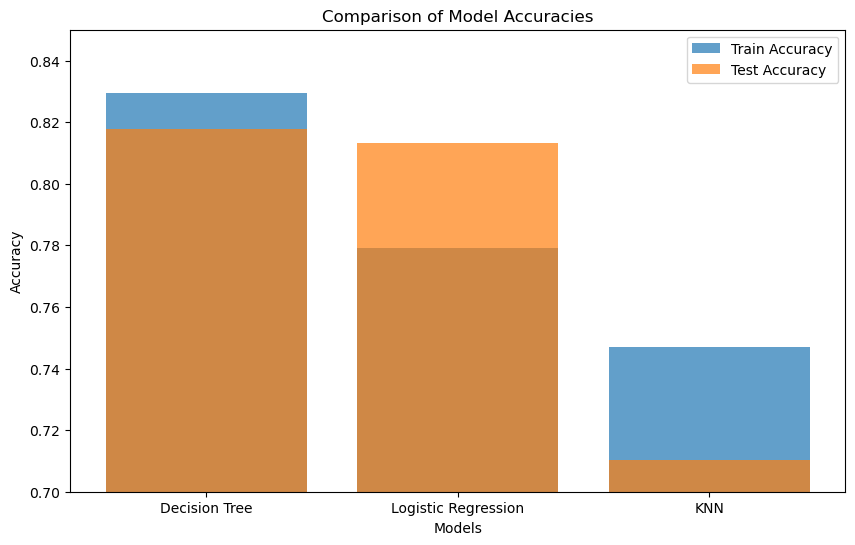

Based on the comparison:
- Decision Tree has the highest test accuracy and shows good generalization.
- Logistic Regression performs reasonably well.
- KNN has the lowest test accuracy and may overfit the data.

Therefore, the Decision Tree model is recommended as the best choice for classifying the data.


In [437]:
train_data_obj.decision_model()

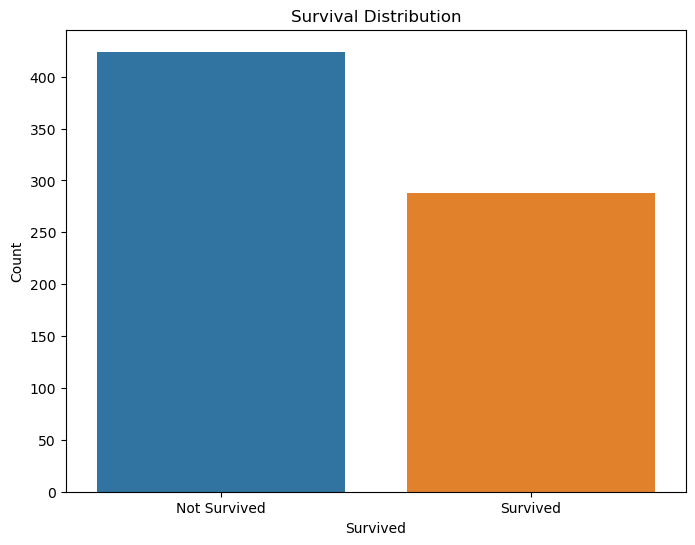

In [438]:
train_data_obj.plot_survival_distribution()

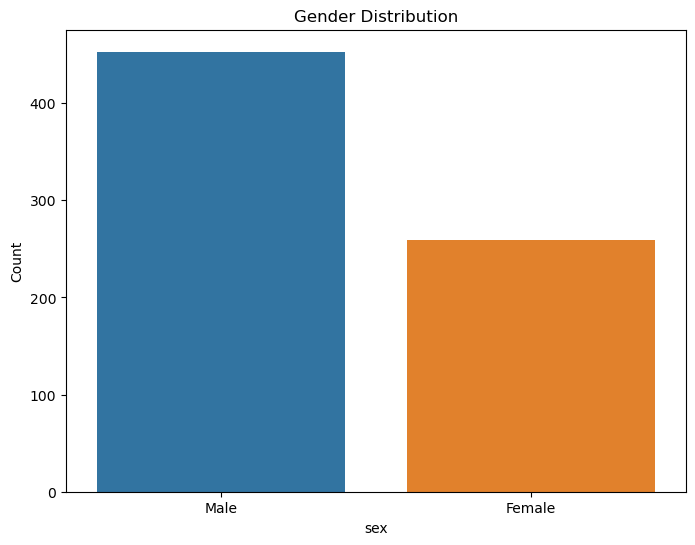

In [439]:
train_data_obj.plot_sex_distribution()

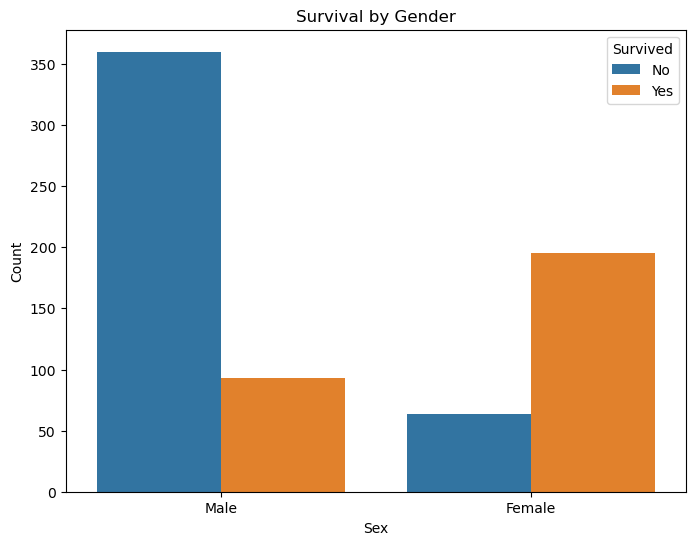

In [440]:
train_data_obj.plot_survival_by_sex()

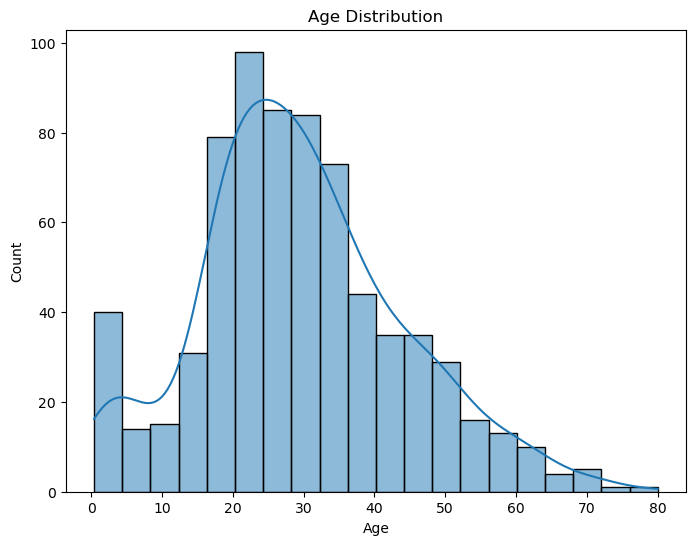

In [441]:
train_data_obj.plot_age_distribution()

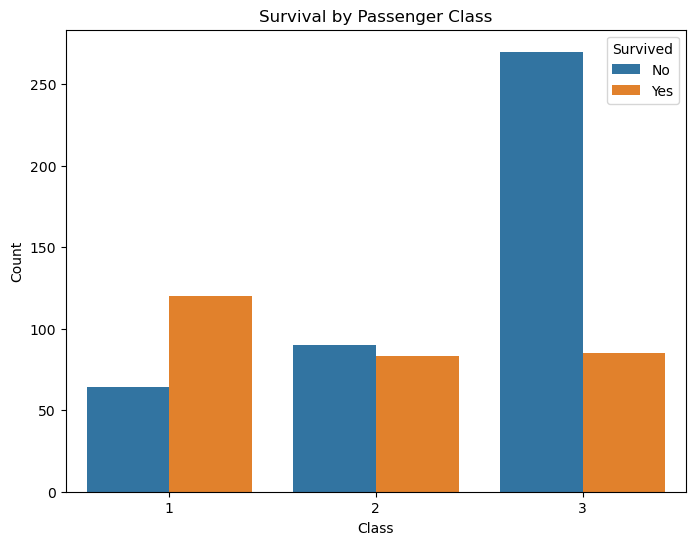

In [442]:
train_data_obj.plot_survival_by_class()